In [1]:
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
from math import sqrt, fabs, log
import pandas as pd
import SimTools



Welcome to JupyROOT 6.18/00


In [2]:
# dataframe containg all data
df = pd.read_pickle("./MS_testing_data.pk")

# dataframe for fitting data
# here we impose sigma < 15 deg
df_test = df.loc[df.sigma < 15.0].reset_index(drop=True)
df_test.head()

,gas,energy,fit_length,ang_dist,sigma,sigma_err
0,he_co2,50,0.5,"[0.2836243488562742, -0.21217659801039965, -0....",12.824354,0.313253
1,he_co2,60,0.5,"[0.2809333215154819, 0.4328480290493081, -0.19...",11.136665,0.282055
2,he_co2,70,0.5,"[0.2825726495786364, 0.2781153110284793, 0.111...",9.226938,0.240446
3,he_co2,80,0.5,"[0.21174185774191606, -0.03428777733440963, 0....",7.800637,0.196537
4,he_co2,90,0.5,"[0.24439253390677027, -0.1292064201578335, -0....",7.571040,0.196594


In [3]:
# Compute sigma predictions using Rossi fit
df_test["R_fit"] = df_test.apply(lambda row: SimTools.rossi_fit( (row.energy/1000.0,row.fit_length/100.0,SimTools.Rad_Lengths[row.gas]), SimTools.rossi_fit_params["S_2"] ) ,axis = 1)

# Compute sigma predictions using Highland fit
df_test["H_fit"] = df_test.apply(lambda row: SimTools.highland_fit( (row.energy/1000.0,row.fit_length/100.0,SimTools.Rad_Lengths[row.gas]), SimTools.highland_fit_params["S_2"] ,  SimTools.highland_fit_params["Eps"] ) ,axis = 1)


In [4]:
# Compe the standard deviation of the prediction errors for both methods
R_std = np.sum((df_test["R_fit"]-df_test["sigma"]).to_numpy()**2)/len(df_test)
H_std = np.sum((df_test["H_fit"]-df_test["sigma"]).to_numpy()**2)/len(df_test)


print("Rossi fit standard deviation of the prediction errors: ", R_std)
print("Highland fit standard deviation of the prediction errors: ", H_std)

Rossi fit standard deviation of the prediction errors:  0.15664169593244365
Highland fit standard deviation of the prediction errors:  0.2849859543406829


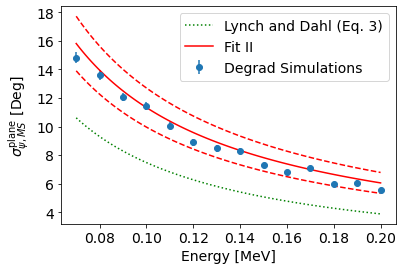

In [8]:
# Plot an example of the fits and original formulas
select_gas = "he_cf4"
fit_lenght = 0.5

df_plot = df_test.loc[ (df_test.gas == select_gas) &  (df_test.fit_length == fit_lenght)]

energy = df_plot["energy"]/1000.0
fit_len = fit_lenght/100.0
rad_l = SimTools.Rad_Lengths[select_gas]

plt.errorbar(energy, df_plot["sigma"], yerr=df_plot["sigma_err"], fmt='o',  label='Degrad Simulations')

Es = np.arange(min(energy),max(energy), (max(energy)-min(energy))/100)

fit2 = [ SimTools.rossi_fit( (E, fit_len, rad_l) , SimTools.rossi_fit_params["S_2"] ) for E in Es]


fit2_err_up = [ SimTools.rossi_fit( (E, fit_len, rad_l) , SimTools.rossi_fit_params["S_2"] + SimTools.S2_std ) for E in Es] 
fit2_err_down = [ SimTools.rossi_fit( (E, fit_len, rad_l) , SimTools.rossi_fit_params["S_2"] - SimTools.S2_std ) for E in Es] 

Eq3 = [ SimTools.highland_fit( (E, fit_len, rad_l) , 13.6, 0.038 ) for E in Es]

plt.plot(Es, Eq3, 'g:', label='Lynch and Dahl (Eq. 3)')
plt.plot(Es, fit2, 'r', label='Fit II')
plt.plot(Es, fit2_err_up, 'r--')
plt.plot(Es, fit2_err_down, 'r--')


plt.legend(fontsize=14)
plt.xlabel("Energy [MeV]",fontsize=14)
plt.ylabel("$\\sigma_{\\psi , MS}^{\\rm plane}$ [Deg]",fontsize=14)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.savefig("../figures/test_rossi.pdf",bbox_inches='tight')



